### Import libraries to perform data analysis, manipulation and visualizations 

testing

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline




In [2]:
# reading the dataset 
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

## Dataset information

The dataset has the amount of 16719 rows and 16 columns in which 9 columns has been identified as dtype:float64 and 7 out of 16 has been identified as object.
It also can be seen that some columns has missing values. 
    

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

## Missing values isnull() funcion 

It has been observed the following missing values in the features below: 
    
Name - 2

Year_of_Release - 269

Genre - 2

Publisher - 54

Critic_Score - 8582

Critic_Count - 8582

User_Score - 6704

User_Count - 9129

Developer - 6623

Rating - 6769


In [6]:
#Identifying missing values 
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
# Drop missing values in following columns: 
df2 = df.dropna(subset=['Name', 'Year_of_Release', 'Genre', 'Publisher', 'User_Score', 'Developer', 'Rating'])
df2.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1828
Critic_Count       1828
User_Score            0
User_Count         2327
Developer             0
Rating                0
dtype: int64

In [8]:
df_mode = df.fillna(df[['User_Score', 'Developer', 'Rating']].mode())

<Axes: xlabel='Developer', ylabel='Count'>

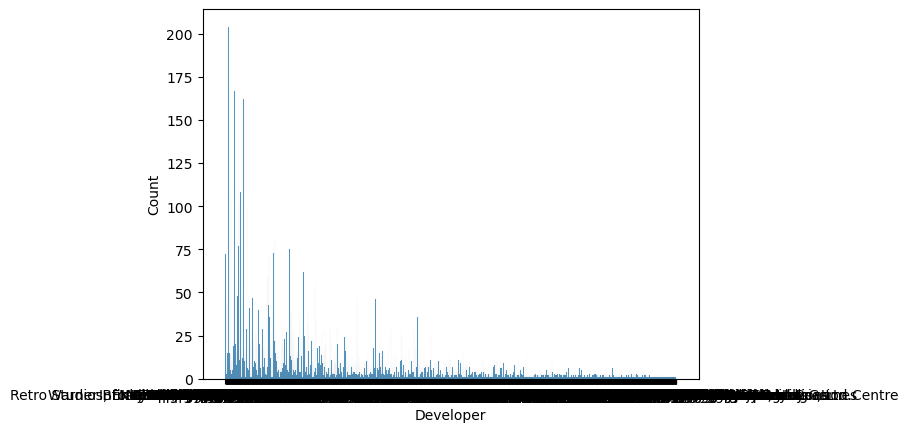

In [9]:
sns.histplot(df_mode.Developer, kde=False)

<Axes: xlabel='Developer', ylabel='Count'>

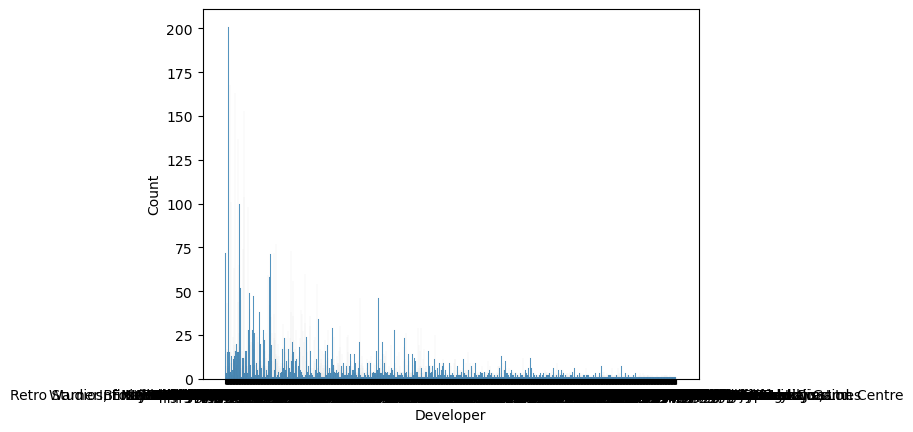

In [10]:
sns.histplot(df2.Developer, kde=False)

In [11]:
df['User_Count'].unique()

array([3.2200e+02,        nan, 7.0900e+02, 1.9200e+02, 4.3100e+02,
       1.2900e+02, 5.9400e+02, 4.6400e+02, 1.4600e+02, 1.0600e+02,
       5.2000e+01, 3.9940e+03, 1.5880e+03, 5.0000e+01, 3.7110e+03,
       7.3000e+02, 1.9000e+01, 3.1400e+02, 8.7130e+03, 1.4540e+03,
       9.2200e+02, 2.2560e+03, 2.6980e+03, 5.2340e+03, 6.6400e+02,
       1.6620e+03, 6.3200e+02, 1.0940e+03, 2.8990e+03, 2.4200e+02,
       4.1000e+03, 2.7200e+02, 2.1470e+03, 2.9510e+03, 1.3800e+02,
       9.2100e+02, 1.1120e+03, 2.0730e+03, 2.8330e+03, 2.1170e+03,
       1.6000e+01, 4.2400e+02, 2.0450e+03, 1.2820e+03, 3.2600e+03,
       1.3500e+02, 2.4000e+01, 1.0470e+03, 1.3200e+03, 6.2600e+02,
       8.5000e+01, 3.5890e+03, 8.9600e+02, 1.2180e+03, 5.4000e+01,
       1.9000e+02, 3.4800e+02, 1.0560e+03, 8.8600e+02, 6.4400e+02,
       2.0300e+02, 4.5100e+02, 1.4430e+03, 3.9800e+02, 1.8540e+03,
       5.8000e+02, 2.1420e+03, 1.7100e+02, 1.1000e+02, 1.7610e+03,
       4.2280e+03, 3.6700e+02, 1.6580e+03, 4.3200e+02, 1.5990e

<Axes: xlabel='Critic_Score', ylabel='Count'>

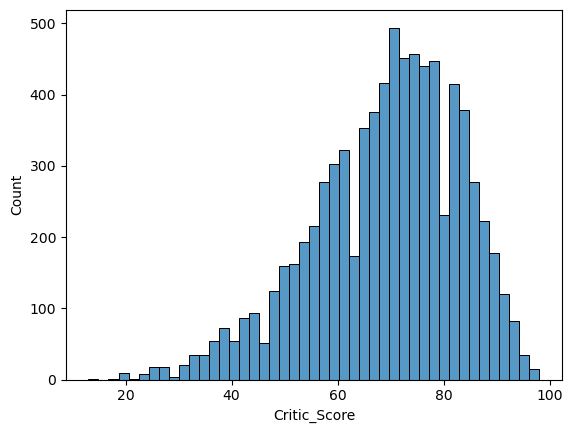

In [12]:
sns.histplot(df2.Critic_Score, kde=False)

In [13]:
df_mean = df2.fillna(df2['Critic_Score'].mean())
df_mean.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

<Axes: xlabel='Critic_Score', ylabel='Count'>

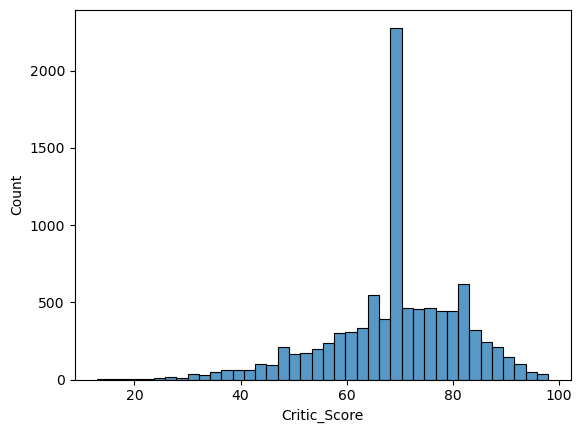

In [14]:
sns.histplot(df_mean.Critic_Score, kde=False, bins=40)

In [15]:
values = {'Critic_Score':0}
df_fill = df2.fillna(value=values)
df_fill.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

<Axes: xlabel='Critic_Score', ylabel='Count'>

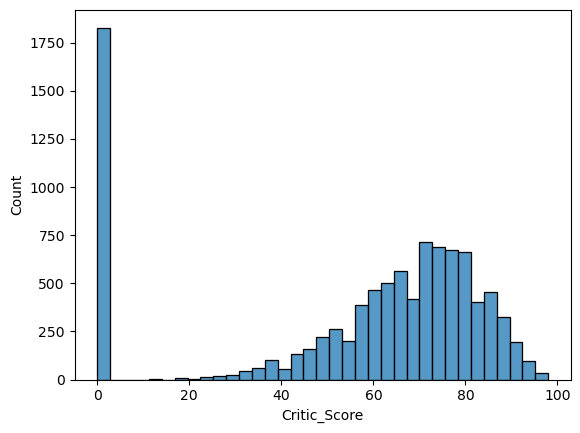

In [16]:
sns.histplot(df_fill.Critic_Score, kde=False)

In [17]:
df2['Critic_Count'].unique()

array([ 51.,  73.,  65.,  41.,  80.,  64.,  63.,  45.,  33.,  50.,  58.,
        62.,  37.,  54.,  81.,  89.,  21., 100.,  39.,  56.,  66.,  57.,
        86.,  74.,  16.,  82.,  67.,  29.,  15.,  70.,  99.,  20.,  87.,
        23.,  24.,  10.,  27.,  42.,  91.,  53.,  75.,  46.,  84.,  38.,
        12.,  90.,  97.,  nan,  44., 105.,  77.,  68.,  28.,  94.,  96.,
        61.,  22.,  88.,  47.,  98.,  85.,  13.,   8.,  95.,  17.,  35.,
        19.,  48.,  14., 113.,  83.,  72.,  30.,  69.,  76.,  18.,  34.,
        40., 101.,   9.,  32.,  78.,  36.,  25.,  59.,  31.,  79.,  26.,
        49.,  60.,  11.,  43., 107.,   7.,  71.,  55.,  52.,  92.,   4.,
        93.,   5.,   6., 103., 102., 106.,   3., 104.])

<Axes: xlabel='Critic_Count', ylabel='Count'>

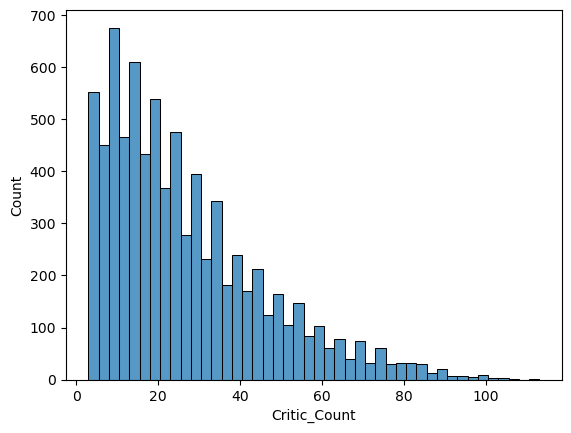

In [18]:
sns.histplot(df2.Critic_Count, kde=False)

In [19]:
df2['User_Score'].unique()

array(['8', '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2',
       '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9',
       '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6',
       '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

<Axes: xlabel='User_Score', ylabel='Count'>

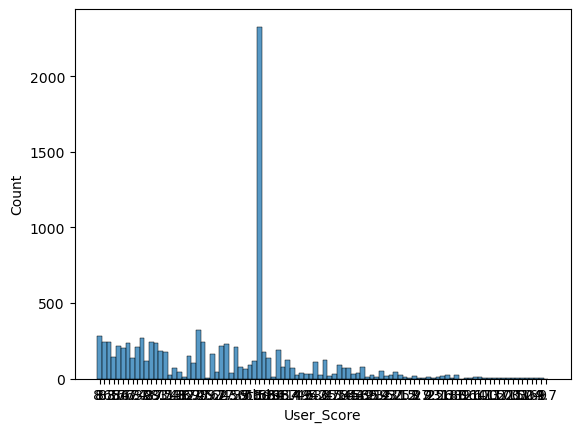

In [20]:
sns.histplot(df2.User_Score, kde=False)

In [21]:
df2['User_Count'].unique()

array([3.2200e+02, 7.0900e+02, 1.9200e+02, 4.3100e+02, 1.2900e+02,
       5.9400e+02, 4.6400e+02, 1.4600e+02, 1.0600e+02, 5.2000e+01,
       3.9940e+03, 1.5880e+03, 5.0000e+01, 3.7110e+03, 7.3000e+02,
       1.9000e+01, 3.1400e+02, 8.7130e+03, 1.4540e+03, 9.2200e+02,
       2.2560e+03, 2.6980e+03, 5.2340e+03, 6.6400e+02, 1.6620e+03,
       6.3200e+02, 1.0940e+03, 2.8990e+03, 2.4200e+02, 4.1000e+03,
       2.7200e+02, 2.1470e+03, 2.9510e+03, 1.3800e+02, 9.2100e+02,
       1.1120e+03, 2.0730e+03, 2.8330e+03, 2.1170e+03, 1.6000e+01,
       4.2400e+02, 2.0450e+03, 1.2820e+03, 3.2600e+03, 1.3500e+02,
       2.4000e+01, 1.0470e+03, 1.3200e+03, 6.2600e+02, 8.5000e+01,
       3.5890e+03, 8.9600e+02, 1.2180e+03, 5.4000e+01, 1.9000e+02,
       3.4800e+02, 1.0560e+03, 8.8600e+02, 6.4400e+02, 2.0300e+02,
       4.5100e+02, 1.4430e+03, 3.9800e+02, 1.8540e+03, 5.8000e+02,
       2.1420e+03, 1.7100e+02, 1.1000e+02, 1.7610e+03, 4.2280e+03,
       3.6700e+02, 1.6580e+03, 4.3200e+02, 1.5990e+03, 5.6800e

<Axes: xlabel='User_Count', ylabel='Count'>

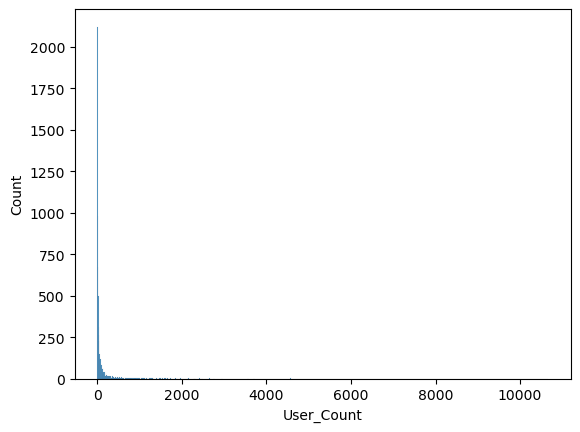

In [22]:
sns.histplot(df2.User_Count, kde=False)

In [23]:
df2['Developer'].unique()

array(['Nintendo', 'Good Science Studio', 'Rockstar North', ...,
       'Big Red Software', 'Atomic Games', 'Interchannel-Holon'],
      dtype=object)

<Axes: xlabel='Developer', ylabel='Count'>

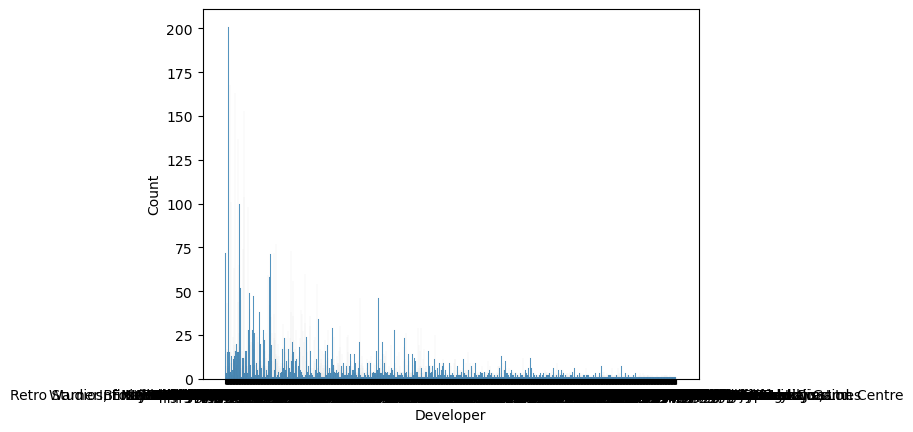

In [24]:
sns.histplot(df2.Developer, kde=False)

<Axes: xlabel='Rating', ylabel='Count'>

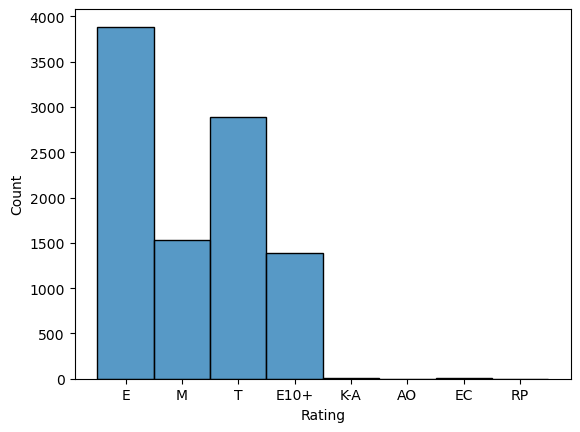

In [25]:
sns.histplot(df2.Rating, kde=False)

<Axes: xlabel='Rating', ylabel='Count'>

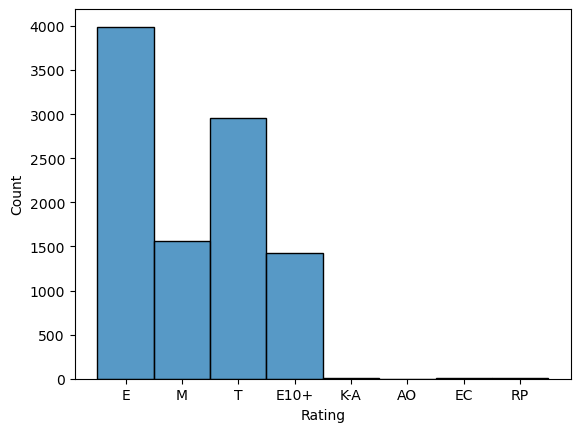

In [26]:
sns.histplot(df_mode.Rating, kde=False)

In [27]:
df2.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

### Imputation using Median 

In [28]:
df_median = df2.fillna(df2[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']].median())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6668\3436235016.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median = df2.fillna(df2[['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']].median())


In [29]:
df_median.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [30]:
df_median.head()

Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

<Axes: xlabel='Critic_Score', ylabel='Count'>

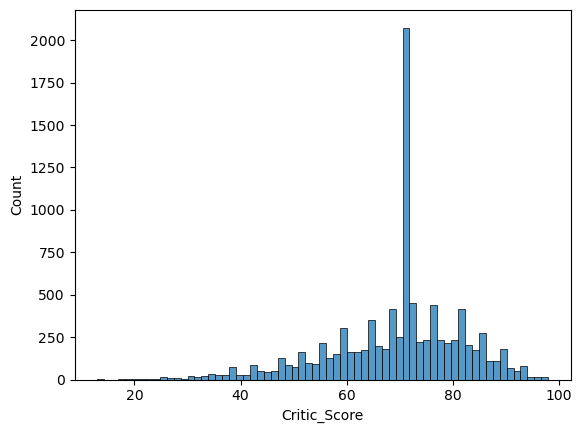

In [31]:
sns.histplot(df_median.Critic_Score, kde=False)

In [32]:
def random_sample_imputation(dfz):
    
  cols_with_missing_values = dfz.columns[dfz.isna().any()].tolist()

  for var in cols_with_missing_values:

    # extract a random sample
    random_sample_df = dfz[var].dropna().sample(dfz[var].isnull().sum(),random_state=0)
    
    # re-index the randomly extracted sample
    random_sample_df.index = dfz[dfz[var].isnull()].index

    # replace the NA
    dfz.loc[dfz[var].isnull(), var] = random_sample_df

  return dfz

In [33]:
dfz = df2.copy()
random_sample_imp_df = random_sample_imputation(df2)
random_sample_imp_df.head()


Name Platform  Year_of_Release     Genre Publisher  \
0             Wii Sports      Wii           2006.0    Sports  Nintendo   
2         Mario Kart Wii      Wii           2008.0    Racing  Nintendo   
3      Wii Sports Resort      Wii           2009.0    Sports  Nintendo   
6  New Super Mario Bros.       DS           2006.0  Platform  Nintendo   
7               Wii Play      Wii           2006.0      Misc  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
6     11.28      9.14      6.50         2.88         29.80          89.0   
7     13.96      9.18      2.93         2.84         28.92          58.0   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
6          65.0        8.5       431.0  Nintendo      E  
7          41.0        6.6       129.0  Nintendo      E

In [34]:
!pip install miceforest

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 16710
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             9705 non-null   object 
 1   Platform         9705 non-null   object 
 2   Year_of_Release  9705 non-null   float64
 3   Genre            9705 non-null   object 
 4   Publisher        9705 non-null   object 
 5   NA_Sales         9705 non-null   float64
 6   EU_Sales         9705 non-null   float64
 7   JP_Sales         9705 non-null   float64
 8   Other_Sales      9705 non-null   float64
 9   Global_Sales     9705 non-null   float64
 10  Critic_Score     9705 non-null   float64
 11  Critic_Count     9705 non-null   float64
 12  User_Score       9705 non-null   object 
 13  User_Count       9705 non-null   float64
 14  Developer        9705 non-null   object 
 15  Rating           9705 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.3+ MB


In [36]:
df_median["Critic_Score_Imp"] = df_median["Critic_Score"]
random_sample_imp_df["Critic_Score_Imp"] = random_sample_imp_df["Critic_Score"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6668\570360340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_sample_imp_df["Critic_Score_Imp"] = random_sample_imp_df["Critic_Score"]


<Axes: ylabel='Density'>

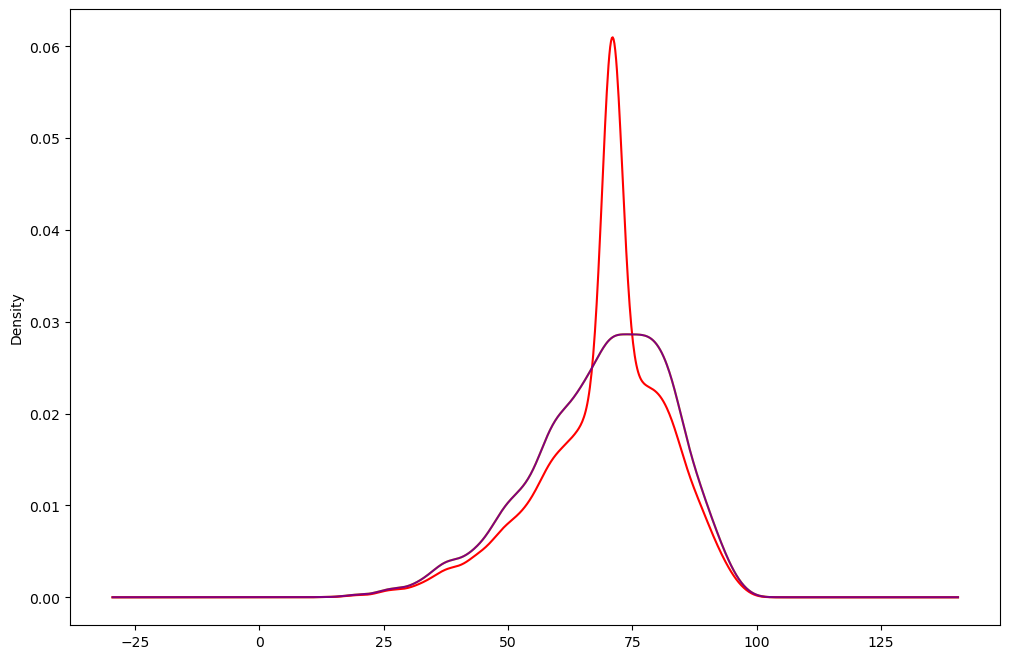

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

df2["Critic_Score"].plot(kind='kde',color='yellow')
df_median["Critic_Score_Imp"].plot(kind='kde',color='red')
random_sample_imp_df["Critic_Score_Imp"].plot(kind='kde',color='purple')

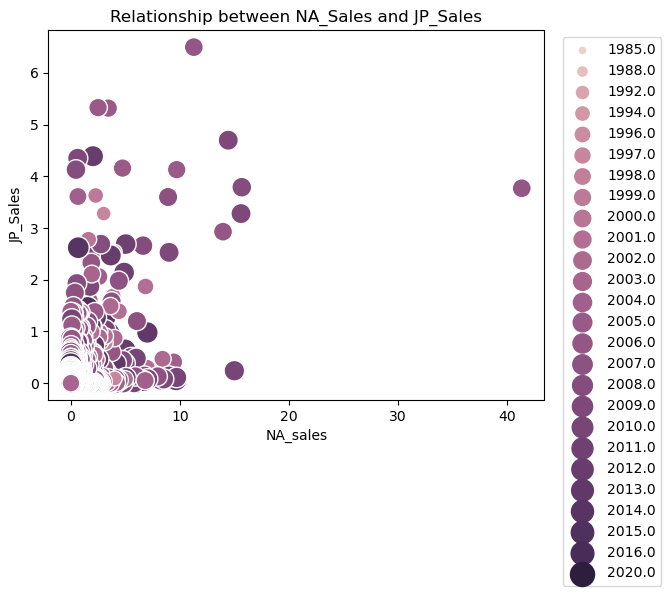

In [38]:
sns.scatterplot(x='NA_Sales', y='JP_Sales', hue='Year_of_Release', data=df2, size='Year_of_Release', sizes=(20, 300), legend="full")


# add labels and title

plt.xlabel("NA_sales")

plt.ylabel("JP_Sales")

plt.title("Relationship between NA_Sales and JP_Sales")
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1));

# display the plot

plt.show()

In [39]:
df2['Global_Sales'].unique()

array([8.253e+01, 3.552e+01, 3.277e+01, 2.980e+01, 2.892e+01, 2.832e+01,
       2.321e+01, 2.270e+01, 2.181e+01, 2.179e+01, 2.104e+01, 2.081e+01,
       2.015e+01, 1.627e+01, 1.615e+01, 1.529e+01, 1.498e+01, 1.473e+01,
       1.461e+01, 1.379e+01, 1.367e+01, 1.347e+01, 1.332e+01, 1.310e+01,
       1.284e+01, 1.266e+01, 1.263e+01, 1.261e+01, 1.213e+01, 1.212e+01,
       1.166e+01, 1.135e+01, 1.101e+01, 1.095e+01, 1.081e+01, 1.070e+01,
       1.060e+01, 1.050e+01, 1.025e+01, 1.012e+01, 9.900e+00, 9.860e+00,
       9.720e+00, 9.710e+00, 9.490e+00, 9.440e+00, 9.360e+00, 9.310e+00,
       9.160e+00, 8.910e+00, 8.790e+00, 8.570e+00, 8.490e+00, 8.380e+00,
       8.270e+00, 8.160e+00, 8.050e+00, 8.010e+00, 7.860e+00, 7.720e+00,
       7.690e+00, 7.660e+00, 7.590e+00, 7.510e+00, 7.380e+00, 7.320e+00,
       7.200e+00, 7.170e+00, 7.160e+00, 7.150e+00, 7.130e+00, 7.090e+00,
       7.070e+00, 6.900e+00, 6.830e+00, 6.760e+00, 6.750e+00, 6.740e+00,
       6.710e+00, 6.680e+00, 6.660e+00, 6.620e+00, 

<Axes: xlabel='Global_Sales', ylabel='Count'>

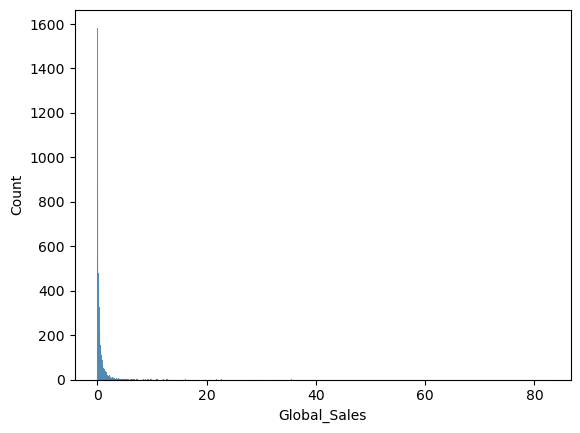

In [40]:
sns.histplot(df2.Global_Sales, kde=False)

<Axes: xlabel='Global_Sales', ylabel='Count'>

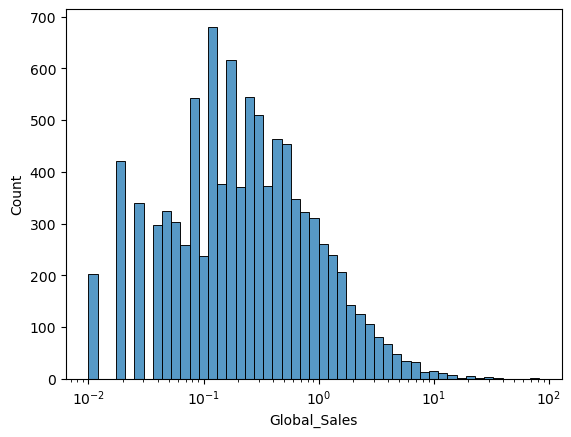

In [41]:
sns.histplot(data=df2, x="Global_Sales", log_scale=True)

<Axes: >

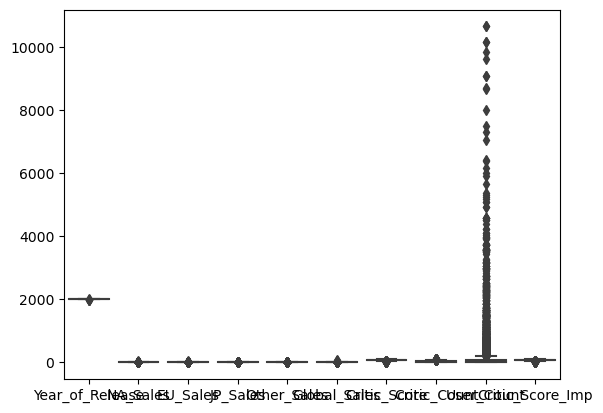

In [42]:
sns.boxplot(df2)

## C) What is the distribution of the most popular 4 game genres?

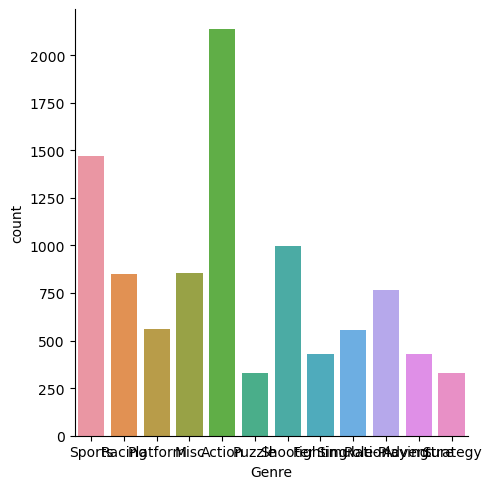

In [43]:
ax = sns.catplot(df2, x='Genre', kind='count')



In [44]:
cut_count_table=pd.crosstab(index=df2['Genre'], columns='count')

In [45]:
cut_count_table

col_0         count
Genre              
Action         2135
Adventure       430
Fighting        430
Misc            857
Platform        559
Puzzle          330
Racing          849
Role-Playing    764
Shooter         995
Simulation      555
Sports         1471
Strategy        330

<Axes: xlabel='Genre'>

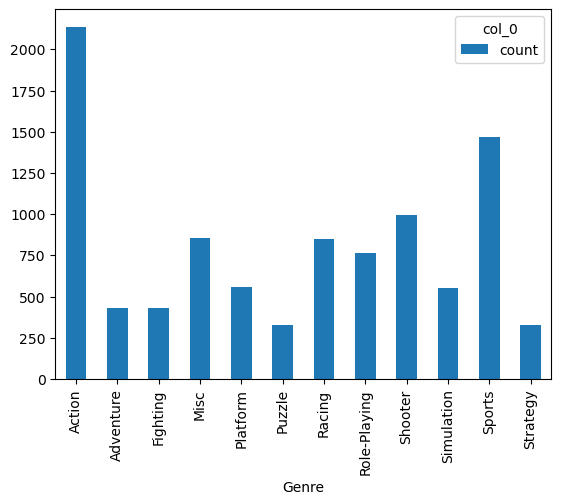

In [46]:
cut_count_table.plot(kind='bar')

In [47]:
developer_count_table=pd.crosstab(index=df2['Developer'], columns='count')

In [48]:
developer_count_table

col_0                                  count
Developer                                   
10tacle Studios                            1
10tacle Studios, Fusionsphere Systems      2
1C, 1C Company                             2
1C, Ino-Co, 1C Company                     1
1C: Maddox Games                           2
...                                      ...
odenis studio                              1
oeFun                                      1
puzzle.tv                                  1
syn Sophia                                 2
zSlide                                     1

[1643 rows x 1 columns]

<Axes: xlabel='Developer'>

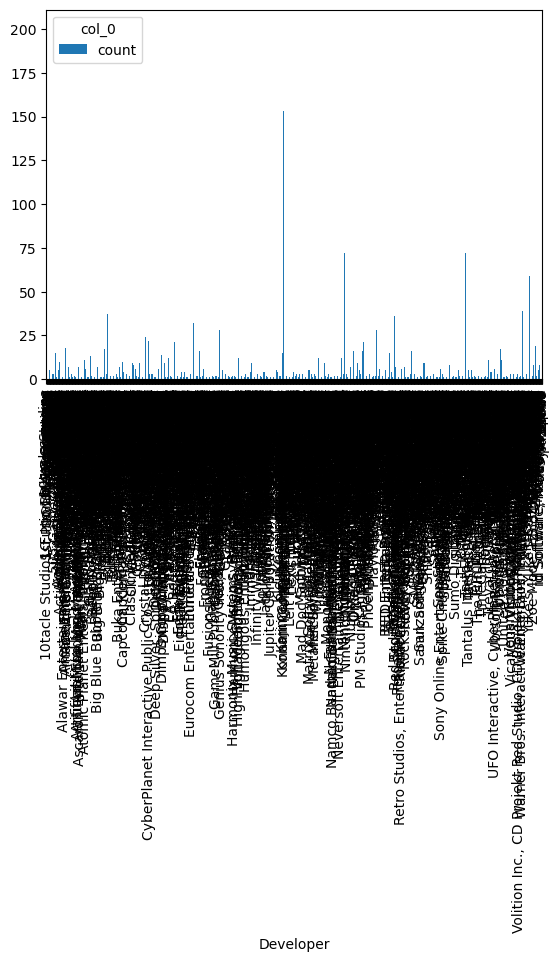

In [49]:
developer_count_table.plot(kind='bar')